Experiments with Flux

In [1]:
using Flux
using RDatasets
using DataFrames
using Random
using Plots
using Statistics

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


In [2]:
iris=dataset("datasets","iris")

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
   9 │         4.4         2.9          1.4         0.2  setosa
  10 │         4.9         3.1          1.5         0.1  setosa
  11 │         5.4         3.7          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 141 │         6.7         3.1          5.6         2.4  virginica
 142 │         6.9         3.1          5.1         2.3  virginica
 143 │         5.8         2.7          5.1         1.9  virginica
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   129 rows omitted

In [47]:
X=convert(Matrix,iris[:,2:4]) # features

150×3 Matrix{Float64}:
 3.5  1.4  0.2
 3.0  1.4  0.2
 3.2  1.3  0.2
 3.1  1.5  0.2
 3.6  1.4  0.2
 3.9  1.7  0.4
 3.4  1.4  0.3
 3.4  1.5  0.2
 2.9  1.4  0.2
 3.1  1.5  0.1
 3.7  1.5  0.2
 3.4  1.6  0.2
 3.0  1.4  0.1
 ⋮         
 3.0  4.8  1.8
 3.1  5.4  2.1
 3.1  5.6  2.4
 3.1  5.1  2.3
 2.7  5.1  1.9
 3.2  5.9  2.3
 3.3  5.7  2.5
 3.0  5.2  2.3
 2.5  5.0  1.9
 3.0  5.2  2.0
 3.4  5.4  2.3
 3.0  5.1  1.8

In [49]:
iris.Species::CategoricalArrays.CategoricalArray

LoadError: UndefVarError: CategoricalArrays not defined

Now convert the labels to onehot encoding

In [3]:
n=nrow(iris) ; l=levels(iris.Species) ; m=length(l)
y=zeros(Int8,(n,m))
for i=1:n
    for j=1:m
        y[i,j]=iris.Species[i]==l[j]
    end
end
y

150×3 Matrix{Int8}:
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 ⋮     
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1
 0  0  1

Split into training and testing data, transpose the data so that each datum is a column. Normalize the features.

In [7]:
Random.seed!(600)
i_rand=randperm(n)
n_train=round(Int,n*0.8) # size of the training set
i_train=i_rand[1:n_train] ; i_test=i_rand[n_train+1:n]
Xtrain=X[i_train,:]' ; Ytrain=y[i_train,:]'
meanX=mean(Xtrain,dims=2)
stdX=std(Xtrain,dims=2)
Xtrain = (Xtrain .- meanX) ./ stdX
Ytest=y[i_test,:]'
Xtest= (X[i_test,:]' .- meanX) ./stdX 


3×30 Matrix{Float64}:
 -0.186552  -0.186552  -0.186552  …  -1.31717   -1.09104   -0.638798
  1.14692   -1.29886    1.14692       0.702236   0.146376   0.479892
  0.549907  -1.29409    1.34019       0.94505    0.02305    0.418193

Plot some dimensions of the data, to get an intuition.

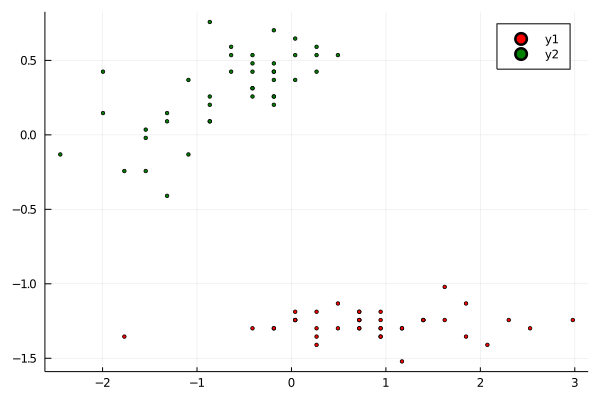

In [8]:
c1i= Ytrain[1,:] .> 0
c2i= Ytrain[2,:] .> 0
plt=Plots.plot(Xtrain[1,c1i],Xtrain[2,c1i],seriestype=:scatter,markersize=2,markercolor=:red)
Plots.plot!(plt,Xtrain[1,c2i],Xtrain[2,c2i],seriestype=:scatter,markersize=2,markercolor=:green)

In [ ]:
mean(Xtrain,dims=2), std(Xtrain,dims=2)

Create the network.

In [41]:
#model=Chain(Dense(3,3),softmax)
model=Chain(Dense(3,100,relu),Dense(100,100,relu),Dense(100,3))

Chain(Dense(3, 100, relu), Dense(100, 100, relu), Dense(100, 3))

In [ ]:
model(Xtrain[:,1]), model(Xtrain[:,2])

In [ ]:
unique(Flux.onecold(Ytrain))

Evaluate acccuracy before training.

In [25]:
accuracy(x, y, model) = mean(Flux.onecold(model(x)|>cpu) .== Flux.onecold(y|>cpu))
#accuracy(Xtrain,Ytrain,model)
accuracy(Xtrain|>gpu,Ytrain,mg)

0.8583333333333333

Loss function

In [11]:
loss(x, y) = Flux.Losses.logitcrossentropy(model(x), y)
loss(Xtrain[:,1],Ytrain[:,1])

1.1473166f0

Optimizer.

In [42]:
using Parameters: @with_kw

@with_kw mutable struct Args
    lr::Float64 = 0.5
    repeat::Int = 1000
end

args=Args(;lr=0.01)

optimiser=Descent(args.lr)
train_seq = Iterators.repeated((Xtrain, Ytrain), args.repeat)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Matrix{Float64}, LinearAlgebra.Adjoint{Int8, Matrix{Int8}}}}}(Base.Iterators.Repeated{Tuple{Matrix{Float64}, LinearAlgebra.Adjoint{Int8, Matrix{Int8}}}}(([2.979172066273817 0.265694662457058 … 0.265694662457058 1.6224333643654363; -1.2432720914532371 -1.410029898056503 … 0.5354778456482663 1.6471965563367057; -1.0306640706641554 -1.2940925871278375 … 0.2864785116542538 1.3401925775089816], Int8[1 1 … 0 0; 0 0 … 1 0; 0 0 … 0 1])), 1000)

In [15]:
theta=Flux.glorot_normal(size(theta)) # initialize parameters
model=re(theta)

LoadError: UndefVarError: theta not defined

In [43]:
@time Flux.train!(loss,params(model),train_seq,optimiser,cb=()->println("accuracy=",accuracy(Xtrain,Ytrain,model), " ", accuracy(Xtest,Ytest,model)))

accuracy=0.2916666666666667 0.3
accuracy=0.30833333333333335 0.3
accuracy=0.31666666666666665 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.325 0.3
accuracy=0.3333333333333333 0.3
accuracy=0.3333333333333333 0.3
accuracy=0.3416666666666667 0.3
accuracy=0.3333333333333333 0.3
accuracy=0.3333333333333333 0.3
accuracy=0.375 0.3333333333333333
accuracy=0.48333333333333334 0.4
accuracy=0.6083333333333333 0.5333333333333333
accuracy=0.675 0.6666666666666666
accuracy=0.6916666666666667 0.7
accuracy=0.7333333333333333 0.8
accuracy=0.7666666666666667 0.8333333333333334
accuracy=0.775 0.8333333333333334
accuracy=0.7666666666666667 0.8333333333333334
accuracy=0.7833333333333333 0.8333333333333334
accuracy=0.8083333333333333 0.8333333333333334
accuracy=0.825 0.8333333333333334
accuracy=0.8333333333333334 0.8333333333333334
accuracy=0.8333333333333334 0.8666666666666667
accuracy=0.8416666666666667 

accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy=0.9 0.9333333333333333
accuracy

accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.9416666666666667 0.9333333333333333
accuracy=0.94

accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0

In [ ]:
accuracy(Xtrain,Ytrain,model)

In [ ]:
accuracy(Xtest,Ytest,model)

In [17]:
using CUDA

In [44]:
mg = model |> gpu

Chain(Dense(3, 100, relu), Dense(100, 100, relu), Dense(100, 3))

In [ ]:
size(params(mg)[1])

In [ ]:
Flux.loadparams!(mg, map(p -> p .= randn.(), Flux.params(mg)))

In [45]:
accuracy(Xtrain,Ytrain,mg)

LoadError: ArgumentError: cannot take the CPU address of a CuArray{Float32, 2}

In [46]:
@time Flux.train!(loss,params(mg),train_seq,optimiser,cb=()->println("accuracy=",accuracy(Xtrain|>gpu,Ytrain,mg), " ", accuracy(Xtest|>gpu,Ytest,mg)))

accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0

accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0

accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0

accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0.95 0.9666666666666667
accuracy=0